In [2]:
import pandas as pd
import numpy as np

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
loan_df= pd.read_csv('datasets/loan_data.csv')

In [4]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


The goal: a model to predict under what conditions the loan is fully paid or not (column 13)

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Data visualization 

In [7]:
loan_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

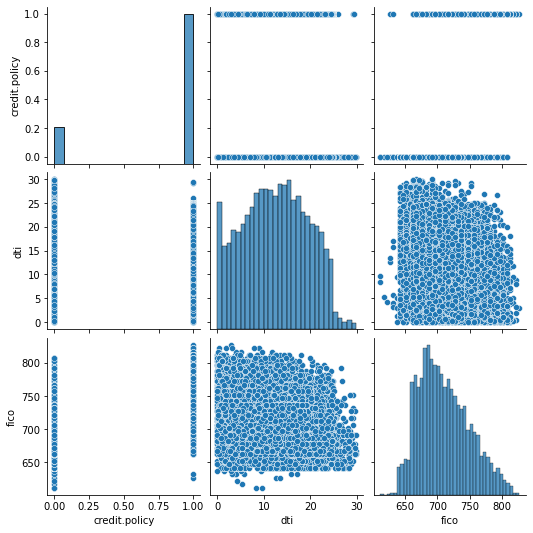

In [10]:
sns.pairplot(loan_df[['credit.policy','dti','fico']])

In [11]:
loan_df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [12]:
loan_df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

<AxesSubplot:xlabel='fico', ylabel='Count'>

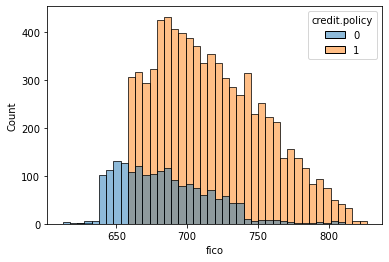

In [13]:
#credit score distribution to acceptance
sns.histplot(x='fico',data=loan_df ,hue='credit.policy')

cutoff of credit score at around 660

<AxesSubplot:xlabel='fico', ylabel='Count'>

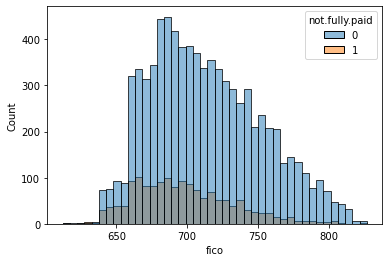

In [14]:
#credit score distribution to repayment
sns.histplot(x='fico',data=loan_df ,hue='not.fully.paid')

In [15]:
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='purpose', ylabel='count'>

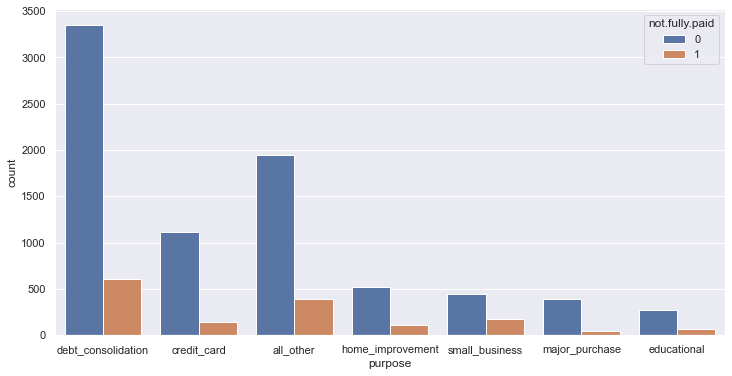

In [16]:
#Count of purpose for the loan and relations to 
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', data=loan_df,hue='not.fully.paid')
# so most use of loan is for debt_consolidation

<Figure size 864x432 with 0 Axes>

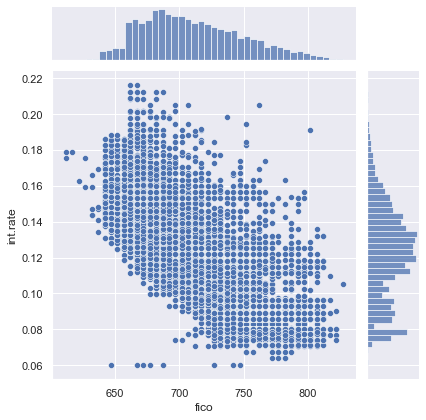

In [17]:
#plot between fico score and interest rate
plt.figure(figsize=(12,6))
sns.jointplot(x='fico', y='int.rate', data=loan_df)
#so 

<Figure size 864x432 with 0 Axes>

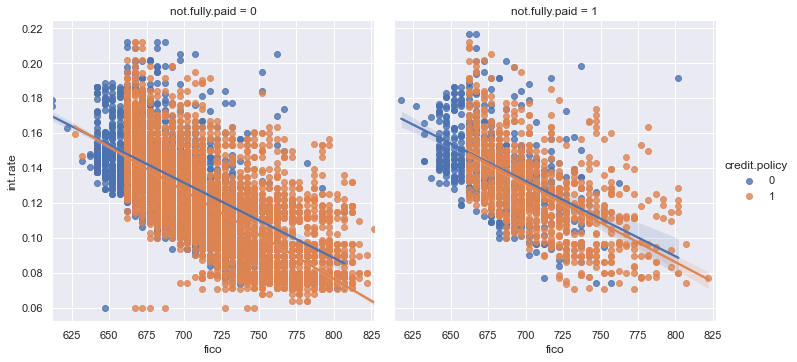

In [18]:
plt.figure(figsize=(12,6))
sns.lmplot(x='fico', y='int.rate', data=loan_df,
            hue='credit.policy',col='not.fully.paid')
#distribution between interest rate and credict score are quite similar regardless
# of if loan was repaid or not            

# Prepossing data

In [19]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [20]:
# 1. Note there is a categorical column ='purpose', so need to use
# sklearn dummy variable to transform to something the machine understands 
loan_df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [21]:
purpose_cat= ['purpose']

In [22]:
final_df= pd.get_dummies(loan_df,columns=purpose_cat,drop_first=True)

In [23]:
#final df now has additional column based on categorical purpose
final_df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X= final_df.drop('not.fully.paid',axis=1)
y=final_df['not.fully.paid'] 

In [26]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

# Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
dtree= DecisionTreeClassifier()

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_predict= dtree.predict(X_test)

In [31]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [32]:
print(confusion_matrix(y_test,y_predict))

[[2011  420]
 [ 342  101]]


# Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=300)

In [35]:
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=300)

In [36]:
y_rfc=rfc.predict(X_test)

In [40]:
print(classification_report(y_test,y_rfc))
print('\n')
print(confusion_matrix(y_test,y_rfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



[[2423    8]
 [ 435    8]]
